In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cityData = "city_data.csv"
rideData = "ride_data.csv"

citydata = pd.read_csv(cityData)
ridedata = pd.read_csv(rideData)

combined_data = pd.merge(ridedata, citydata, how="left", on=["city", "city"])
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
# rc=rural city, uc=urban cities, sc= suburban cities C=count
uc = combined_data[combined_data["type"] == "Urban"]
sc = combined_data[combined_data["type"] == "Suburban"]
rc = combined_data[combined_data["type"] == "Rural"]

u_rideC = uc.groupby(["city"]).count()["ride_id"]
u_avgfare = uc.groupby(["city"]).mean()["fare"]
u_driverC = uc.groupby(["city"]).mean()["driver_count"]

s_rideC = sc.groupby(["city"]).count()["ride_id"]
s_avgfare = sc.groupby(["city"]).mean()["fare"]
s_driverC = sc.groupby(["city"]).mean()["driver_count"]

r_rideC = rc.groupby(["city"]).count()["ride_id"]
r_avgfare = rc.groupby(["city"]).mean()["fare"]
r_driverC = rc.groupby(["city"]).mean()["driver_count"]

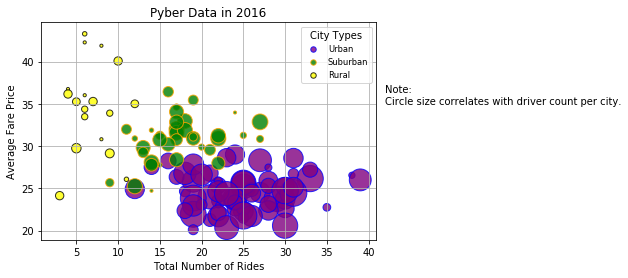

In [6]:
# scatter plots
plt.scatter(u_rideC, 
            u_avgfare, 
            s=10*u_driverC, c="purple", 
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(s_rideC, 
            s_avgfare, 
            s=10*s_driverC, c="green", 
            edgecolor="orange", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(r_rideC, 
            r_avgfare, 
            s=10*r_driverC, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# other graph properties
plt.title("Pyber Data in 2016")
plt.ylabel("Average Fare Price")
plt.xlabel("Total Number of Rides")
plt.grid(True)

# legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# plotting
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

plt.savefig("pic1.png")
plt.show()

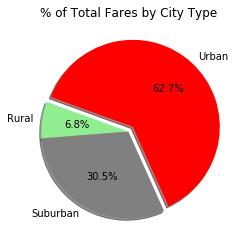

In [7]:
# Calculations 
type_percents = 100 * combined_data.groupby(["type"]).sum()["fare"] / combined_data["fare"].sum()

# Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["lightgreen", "grey", "red"], 
        explode=[0, 0, 0.075], 
        autopct='%1.1f%%', 
        shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")

plt.savefig("pie1.png")

# show
plt.show()

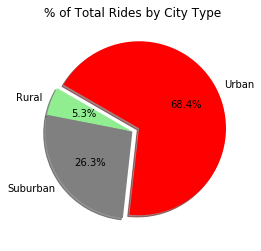

In [8]:
# Calculation
ride_percents = 100 * combined_data.groupby(["type"]).count()["ride_id"] / combined_data["ride_id"].count()

# Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["lightgreen", "grey", "red"], 
        explode=[0, 0, 0.085], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

plt.savefig("pie2.png")

# Show 
plt.show()

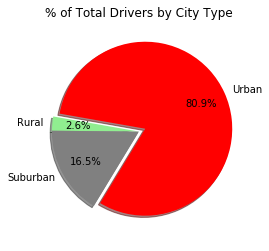

In [9]:
# Calculations
driver_percents = 100 * citydata.groupby(["type"]).sum()["driver_count"] / citydata["driver_count"].sum()

# Pie Chart
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["lightgreen", "grey", "red"], 
        explode=[0, 0, 0.08], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")

plt.savefig("pie3.png")

# Show 
plt.show()